# Napovedovanje oglasov za prikaz uporabnikom, s ciljem povečati CTR (click-through ratio) #

In [16]:
unique_user_id_1 = "./sample_data/users_1.csv"
unique_user_id_0 = "./sample_data/users_0.csv"



df_ids_1 = pd.read_csv(unique_user_id_1, header=0, sep='\t', usecols=[1])
df_ids_0 = pd.read_csv(unique_user_id_0, header=0, sep='\t', usecols=[1])


all_files = glob.glob(path)
for f in all_files:
    df = pd.read_csv(f, header=None, sep='\t',
                     names=["Date", "DayOfWeek", "TimeFrame", "UserID", "SiteID", "CampaignID", "AdID", "ZoneID",
                            "MasterSiteID", "SiteCategory", "AdIndustry", "Requests", "Views", "Clicks"],
                     index_col=False)

    name = os.path.basename(f)

    df_0 = df.loc[df["UserID"].isin(df_ids_0.values)]

    df_0.to_csv("./sample_data/0" + "\\" + name, "\t",
              header=["Date", "DayOfWeek", "TimeFrame", "UserID", "SiteID", "CampaignID", "AdID", "ZoneID",
                      "MasterSiteID", "SiteCategory", "AdIndustry", "Requests", "Views", "Clicks"], index=False)

    df_1 = df.loc[df["UserID"].isin(df_ids_1.values)]

    df_1.to_csv("./sample_data/1" + "\\" + name, "\t",
                header=["Date", "DayOfWeek", "TimeFrame", "UserID", "SiteID", "CampaignID", "AdID", "ZoneID",
                        "MasterSiteID", "SiteCategory", "AdIndustry", "Requests", "Views", "Clicks"], index=False)
    
    

Na sejmu podjetij na FRI-ju smo se povezali s firmo iProm, ki so nam zagotovili podatke o uporabnikih in oglasih,
ki jih prikazujejo. Zaradi GDPR-ja so vsi uporabniki predstavljeni z enoličnimi ID-ji. Zaupali so nam, da na dan
dobijo 100GB podatkov, kar bi bil za nas problem, saj bi za procesiranje potrebovali vrhunsko strojno opremo. Iz
njihovih podatkov so nam zato dali reprezentativni vzorec, s katerim lahko delamo. Kljub temu je podatkov za
procesiranje preveč, zato smo jih moral razredčiti in odstraniti atribute, ki nam ne pomagajo.

Naš glavni cilj je napovedati katere oglase prikazati uporabniku, da bi zagotovili čim večji CTR. 

Uporabnike bomo predstavili, kot vektorje, katerih komponente so njihovi interesi, na podlagi katerih bomo uporabnike
razdelili v gruče. Glavni atributi, s katerimi bomo delali so SiteCategory, UserID, AdID, MasterSiteID, AdIndustry, 
Views, Clicks.

Podatki so razdeljeni na več datotek glede na datum. Stolpci z vrednostnimi so ločeni s tabulatorjem.

### Atributi
<table>
	<tr><th>ID</th><th>Atribut</th><th>Razlaga</th> </tr>
	<tr><td>1</td> <td>Date</td> <td>datum v formatu `leto-mesec-dan`</td></tr>
	<tr><td>2</td> <td>DayOfWeek</td> <td>dan v tednu od 0=ponedeljek do 6=nedelja</td></tr>
	<tr><td>3</td> <td>TimeFrame</td> <td>časovni izsek dneva - dan je razdeljen na 6 kosov po 4 ure, vrednost je indeks od 0 do 5</td></tr>
	<tr><td>4</td> <td>UserID</td> <td>ID uporabnika</td></tr>
	<tr><td>5</td> <td>SiteID</td> <td>ID obiskane spletne strani</td></tr>
	<tr><td>6</td> <td>CampaignID</td> <td>ID akcije kateri pripada oglas</td></tr>
	<tr><td>7</td> <td>AdID</td> <td>ID oglasa</td></tr>
	<tr><td>8</td> <td>ZoneID</td> <td>ID cone v kateri se je oglas prikazal</td></tr>
	<tr><td>9</td> <td>MasterSiteID</td> <td>ID medija</td></tr>
	<tr><td>10</td> <td>SiteCategory</td> <td>ID kategorije spletne strani, ni definiran za vse</td></tr>
	<tr><td>11</td> <td>AdIndustry</td> <td>ID panoge oglasa/akcije, ni definiran za vse</td></tr>
	<tr><td>12</td> <td>Requests</td> <td>število poslanih zahtevkov za prikaz oglasa</td></tr>
	<tr><td>13</td> <td>Views</td> <td>število, ki predstavlja koliko krat je uporabnik videl oglas (vsaj 50% površine oglasa v vidnem polju za vsaj 1 sekundo)</td></tr>
	<tr><td>14</td> <td>Clicks</td> <td>število, ki predstavlja koliko krat je uporabnik kliknil na oglas</td></tr>

</table>

### Panoge oglasa/akcije
<table>
	<tr><th>ID</th><th>Panoga</th> </tr>
	<tr><td>0</td> <td>*Manjkajoč podatek</td> </tr>
	<tr><td>1</td> <td>Avtomobilizem</td> </tr>
	<tr><td>2</td> <td>Kozmetika</td> </tr>
	<tr><td>3</td> <td>Zdravje</td> </tr>
	<tr><td>4</td> <td>Dom</td> </tr>
	<tr><td>5</td> <td>Gospodinjstvo</td> </tr>
	<tr><td>6</td> <td>Hrana&Pijaca</td> </tr>
	<tr><td>7</td> <td>Moda</td> </tr>
	<tr><td>8</td> <td>Informacijska tehnologija</td> </tr>
	<tr><td>9</td> <td>Zabava&prosti cas</td> </tr>
	<tr><td>10</td> <td>Telekomunikacije</td> </tr>
	<tr><td>11</td> <td>Finance</td> </tr>
	<tr><td>12</td> <td>Izobraževanje</td> </tr>
	<tr><td>13</td> <td>Storitve</td> </tr>
	<tr><td>14</td> <td>Turizem</td> </tr>
	<tr><td>15</td> <td>Ostalo</td> </tr>
	<tr><td>16</td> <td>Nepremičnine</td> </tr>
	<tr><td>17</td> <td>Trgovina</td> </tr>
	<tr><td>18</td> <td>Šport</td> </tr>
	<tr><td>21</td> <td>Test</td> </tr>
	<tr><td>22</td> <td>Test</td> </tr>

</table>

### Kategorije spletnih strani
<table>
	<tr><th>ID</th><th>Panoga</th> </tr>
	<tr><td>0</td> <td>*Manjkajoč podatek</td> </tr>
	<tr><td>1</td> <td>Arts & Entertainment</td> </tr>
	<tr><td>2</td> <td>Avtomobilizem</td> </tr>
	<tr><td>3</td> <td>Business</td> </tr>
	<tr><td>4</td> <td>Mlade družine</td> </tr>
	<tr><td>5</td> <td>Zdravje</td> </tr>
	<tr><td>6</td> <td>Kulinarika</td> </tr>
	<tr><td>7</td> <td>Hobbies & Interests</td> </tr>
	<tr><td>8</td> <td>Dom in Vrt</td> </tr>
	<tr><td>9</td> <td>Novice</td> </tr>
	<tr><td>10</td> <td>Sports</td> </tr>
	<tr><td>11</td> <td>Style & Fashion</td> </tr>
	<tr><td>12</td> <td>Technology & Computing</td> </tr>
	<tr><td>13</td> <td>Travel</td> </tr>
	<tr><td>14</td> <td>Nepremičnine</td> </tr>
	<tr><td>15</td> <td>Careers</td> </tr>
	<tr><td>16</td> <td>Education</td> </tr>
	<tr><td>17</td> <td>Law Govt & Politics</td> </tr>
	<tr><td>18</td> <td>Personal Finance</td> </tr>
	<tr><td>19</td> <td>Society</td> </tr>
	<tr><td>20</td> <td>Science</td> </tr>
	<tr><td>21</td> <td>Pets</td> </tr>
	<tr><td>22</td> <td>Shopping</td> </tr>
	<tr><td>23</td> <td>Religion and Spirituality</td> </tr>
	<tr><td>24</td> <td>Uncategorized</td> </tr>
	<tr><td>25</td> <td>Non Standard Content</td> </tr>
	<tr><td>26</td> <td>Illegal Content</td> </tr>
	<tr><td>1000</td> <td>Aktivni športniki</td> </tr>
	<tr><td>1001</td> <td>Šport</td> </tr>
	<tr><td>1002</td> <td>Mladi in Najmlajši</td> </tr>
	<tr><td>1003</td> <td>Gospodarstvo in Posel</td> </tr>
	<tr><td>1004</td> <td>Lifestyle/Trendi</td> </tr>
	<tr><td>1005</td> <td>iTech & Mobile & Foto</td> </tr>
	<tr><td>1006</td> <td>Turizem</td> </tr>
	<tr><td>1007</td> <td>Prosti čas</td> </tr>
	<tr><td>1008</td> <td>Test</td> </tr>
	<tr><td>1009</td> <td>Test</td> </tr>
	<tr><td>1010</td> <td>zavarovalnistvo</td> </tr>

</table>

Na začetku smo naredili nekaj statističnih raziskav, da smo se bolje spoznali s podatki. Ugotovili smo, da se CTR spreminja glede na to kateri dan v tednu gledamo, kar bomo pri raziskavi morali upoštevati. Največ uporabnikov ima CTR okoli 0.1% kar pomeni, da klikne na vsak 1000 oglas, ki se jim prikaže. Naš cilj bo to izboljšati, s pomočjo napovedovanja glede na njihove interese.

<img src="Visualization/users_ctr.png">

![](Visualization/users_ctr.png)
users_ctr.png

Ko smo začeli razmišljati o tem, gleda na kateri atribut naj naredimo gruče za kasnejše napovedovanje smo naleteli na vprašanje, ali lahko na enak način obravnavamo uporabnike, ki še nikoli niso kliknili na oglas in tiste, ki so že. Na koncu smo se odločili, da bomo uporabnike segmentirali glede na to, ali so že kdaj kliknili na oglas in na podlagi tega za vsak segment ustvarili svoj model, ki bo napovedoval najboljšo panogo oglasa, ki bi jo bilo smiselno prikazati uporabniku.

In [6]:
import pandas as pd
import glob
import os

In [15]:
path = "sample_data/sample_1.csv"

all_files = glob.glob(path)
df = pd.concat((pd.read_csv(f, header=None, sep='\t', usecols=[3, 13], names=["userID", "Clicks"]) for f in all_files), ignore_index=True)


df1 = df.groupby(["userID"]).sum().reset_index()
df1 = df1[df1["Clicks"] != 0]
df1.to_csv("./sample_data/users_1.csv", "\t", header=["userID", "Clicks"])
print("First 10 users with clicks:")
print(df1[:10])
print()

df2 = df.groupby(["userID"]).sum().reset_index()
df2 = df2[df2["Clicks"] == 0]
df2.to_csv("./sample_data/users_0.csv", "\t", header=["userID", "Clicks"])
print("First 10 users without clicks:")
print(df2[:10])

First 10 users with clicks:
        userID  Clicks
26   100037018       1
38   100056603       2
152  100197708       2
165  100208142       6
178  100221421       2
390  100473297       1
436  100521394       1
525  100610615       1
526  100611985       1
545  100630487       1



First 10 users without clicks:
      userID  Clicks
0  100000069       0
1  100001697       0
2  100002417       0
3  100003687       0
4  100004824       0
5  100005130       0
6  100006394       0
7  100007912       0
8  100008156       0
9  100008560       0


In [16]:
unique_user_id_1 = "./sample_data/users_1.csv"
unique_user_id_0 = "./sample_data/users_0.csv"



df_ids_1 = pd.read_csv(unique_user_id_1, header=0, sep='\t', usecols=[1])
df_ids_0 = pd.read_csv(unique_user_id_0, header=0, sep='\t', usecols=[1])


all_files = glob.glob(path)
for f in all_files:
    df = pd.read_csv(f, header=None, sep='\t',
                     names=["Date", "DayOfWeek", "TimeFrame", "UserID", "SiteID", "CampaignID", "AdID", "ZoneID",
                            "MasterSiteID", "SiteCategory", "AdIndustry", "Requests", "Views", "Clicks"],
                     index_col=False)

    name = os.path.basename(f)

    df_0 = df.loc[df["UserID"].isin(df_ids_0.values)]

    df_0.to_csv("./sample_data/0" + "\\" + name, "\t",
              header=["Date", "DayOfWeek", "TimeFrame", "UserID", "SiteID", "CampaignID", "AdID", "ZoneID",
                      "MasterSiteID", "SiteCategory", "AdIndustry", "Requests", "Views", "Clicks"], index=False)

    df_1 = df.loc[df["UserID"].isin(df_ids_1.values)]

    df_1.to_csv("./sample_data/1" + "\\" + name, "\t",
                header=["Date", "DayOfWeek", "TimeFrame", "UserID", "SiteID", "CampaignID", "AdID", "ZoneID",
                        "MasterSiteID", "SiteCategory", "AdIndustry", "Requests", "Views", "Clicks"], index=False)
    
    

Po delitvi smo lahko začeli graditi modela za napoved. Prvi model je bil za uporabnike, ki so v njihovi zgodovini že kdaj kliknili na oglas. Najprej je bilo potrebno iz njih ustvariti vektorje, ki opisujejo katere vrste oglasov so do sedaj že kliknili. To je temeljna informacija, ki opisuje njihove navade in uporabnike deli v skupine. Na podlagi teh informacij smo najprej izvedli PCA, da smo dobili informacijo o podobnosti uporabnikov, prav tako pa smo iz vektorjev dolžine 22 prostor zmanjšali na dve dimenziji, kar omogoče bolj intuitivno vizualizacijo.

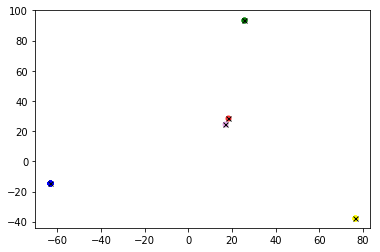

In [31]:
import numpy as np
import glob
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
class Model1:

    def __init__(self,path):
        self.path = path
        self.all_files = glob.glob(path)
        self.df, self.df2 = self.read_to_df(self.all_files)
        self.k_clusters = 6
        self.categories = np.arange(23)
        self.users = ""
        self.labels = ""
        self.centroids = ""
        self.dimension_reduce = ""
        self.userSkupina = ""

    def read_to_df(self,all_files):
        df = pd.read_csv(f, header=0, sep='\t', usecols=[3, 10, 13], dtype={"Clicks": np.float},  names=["UserID", "AdIndustry", "Clicks"])
        df = df.loc[(df["AdIndustry"] != 0)] #& (df["AdIndustry"] != "0")]
        df = df.groupby(["UserID", "AdIndustry"]).sum()
        df = df.loc[df["Clicks"] > 0]
        pomozni = df.copy().reset_index()
        #df2 = df.copy().reset_index() # real clicks
        #del df2["AdIndustry"]
        #df2 = df2.groupby("UserID").sum().reset_index()
        df = df.groupby(level=0).apply(lambda x: 100 * x/x.sum()).reset_index()
        df.rename(columns={df.columns[2]: "Size"}, inplace=True)
        #self.df = df
        #self.df2 = df2
        return df,pomozni


    def build_matrix_1(self,df):
        from collections import defaultdict
        self.users = self.df["UserID"].unique() # vsi unikatni userji (no duplicates)

        vektoruser = defaultdict(dict) # slovar slovarjev

        # index je row index(tega nerabmo)
        # user = UserID in SiteCategory in Size
        for index, user in self.df.iterrows():
            vektoruser[user["UserID"]][user["AdIndustry"]] = user["Size"] # prvi slovar so userji, kljuci so slovarji kategorij vrednosr je size(procenti)

        # predpripavimo matriko, tako da vse vrednosti nastavimo na 0
        matrika=[]
        for _ in range(0,len(self.users)):
            row=[]
            for _ in range(0,len(self.categories)):
                row.append(0)
            matrika.append(row)

        # skozi vse userje (i = vrstica) in skozi vse kategorije (j = stolpec)
        for i,user in enumerate(self.users):
            for j,category in enumerate(self.categories):
                if user in vektoruser and category in vektoruser[user]:
                    matrika[i][j] = vektoruser[user][category]
        return np.array(matrika)

    def kmeans(self, k):
        self.k_clusters = k
        matrika = self.build_matrix_1(self.df)
        embedding = PCA(n_components=2)
        self.dimension_reduce =  embedding.fit_transform(matrika)
        kmeans = KMeans(n_clusters=self.k_clusters, max_iter=150).fit(self.dimension_reduce)
        self.labels = kmeans.labels_
        self.centroids = kmeans.cluster_centers_

    '''
    kmeans = KMeans(K=6, X=dimension_reduce, M=dimension_reduce, resolve_empty='singleton')
    kmeans.initialise()
    kmeans.cluster()
    clustering_results = kmeans.clustering_results
    labels = np.where(clustering_results == 1)[1]
    '''
    def plot(self):
        color = {0:"red", 1:"blue", 2:"yellow", 3:'green', 4:'violet', 5:'pink', 6: 'black'}
        for c, x in zip(self.labels, self.dimension_reduce):
            plt.plot(x[0], x[1], ".", color=color[c], markersize=10.0, alpha=0.05)

        for x,y in self.centroids:
            plt.plot(x,y,"x", color="black", markersize=5.0, alpha=1)
        plt.show()

    def results(self):
        matrika = []
        for _ in range(self.k_clusters):
            row = []
            for _ in self.categories:
                row.append(0)
            matrika.append(row)

        self.userSkupina = { i: set() for i in range(self.k_clusters)}

        for i,x in enumerate(self.users):
            poizvedba = self.df2.loc[self.df2["UserID"] == x]
            kliki = poizvedba["Clicks"].sum()
            self.userSkupina[self.labels[i]].add((x,kliki))

        # TODO: Izboljšaj to gradnjo matrike, ker je počasnejša od tvoje mame.
        for k,v in self.userSkupina.items(): # k = gruca a.k.a vrstice
            vsi = sum(n for _,n in v)    # vsi kliki v gruci
            for i in self.categories:    # za vsako kategorijo
                sestevek = 0
                for user,_ in v:         # za vsakega userja v gruci gledam koliko klikov na kategorijo ma
                    sql = self.df2.loc[(self.df2["UserID"] == user) & (self.df2["AdIndustry"] == i)]
                    if not sql.empty:
                        sestevek += sql.values[0][2]
                matrika[k][i] = sestevek/vsi
        return np.array(matrika)


model1 = Model1("./sample_data/1/sample_1")
model1.kmeans(5)
model1.plot()

Ugotovili smo, da se glede na klike formira malo gruč. Najprej nas je zmedlo, ker se je na grafu izrisalo le nekaj krogcev, ki predstavljajo uporabnike, vendar smo kasneje ugotovili, da glede na to, da je klikov relativno malo obstaja večja verjetnost, da ista pika predstalja več uporabnikov, kar se je izkazalo za resnično, kar smo ugotovili tako, da smo plotu dodali alfa vrednost, ki je pokazala to, da so bolj obarvane točke večje gruče uporabnikov. Najbolje se nam je zdelo, da za število gruč vzamemo kar število različnih točk.

Nato smo zgradili še model za napovedovanje, za uporabnike, ki še niso nikoli kliknili. Za razliko od prej, ko smo za gručenje uporabljali informacijo o tem, katere oglase so posamezniki kdaj klikali, smo v tem primeru izbrali za atribut po katerem bomo izvedli gručenje kategorije spletnih strani, ki jih uporabnik obiskuje. Predvidevali smo, da bo tokrat graf bolj heterogen, kar se je izkazalo za resnico, saj ljudje ponavadi obiskujemo več vrst spletnih strani.

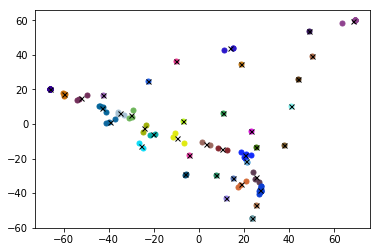

In [32]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from random import randint
from collections import defaultdict

class ModelUsersWithNoClicks:
    def __init__(self, path):
        self.all_files = glob.glob(path)
        self.df = self.process_data()
        self.matrix = self.make_matrix()

    def process_data(self):
        original_df = pd.read_csv(path, header=0, sep='\t', usecols=[3, 9], names=["UserID", "SiteCategory"], dtype={"UserID": np.int64, "siteCategory": np.float})
        df = original_df.loc[(original_df["SiteCategory"] != 0)]
        df = df.groupby(["UserID", "SiteCategory"]).size()
        df = df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
        df.rename(columns={df.columns[2]: "Size"}, inplace=True)
        return df

    def make_matrix(self):
        users = self.df["UserID"].unique()[:-1]  # vsi unikatni userji (no duplicates)
        categories = self.df["SiteCategory"].unique()[:-1]  # vse unikatne kategorija

        vector_users = defaultdict(dict)  # slovar slovarjev
        # user = UserID in SiteCategory in Size
        for index, user in self.df.iterrows():
            vector_users[user["UserID"]][user["SiteCategory"]] = user["Size"]  # prvi slovar so userji, kljuci so slovarji kategorij vrednosr je size(procenti)

        # fill matrix rows with 0
        matrika = []
        for _ in range(0, len(users)):
            row = []
            for _ in range(0, len(categories)):
                row.append(0)
            matrika.append(row)

        # skozi vse userje (i = vrstica) in skozi vse kategorije (j = stolpec)
        for i, user in enumerate(users):
            for j, category in enumerate(categories):
                if user in vector_users and category in vector_users[user]:
                    matrika[i][j] = vector_users[user][category]
        return np.array(matrika)

    def kMeans(self, k, plot=False):
        embedding = PCA(n_components=2)
        dimension_reduce = embedding.fit_transform(self.matrix[:100])
        #print(dimension_reduce)

        colors = ["#%06X" % randint(0, 0xFFFFFF) for i in range(k)]
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dimension_reduce)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        if plot: self.plot(dimension_reduce, colors, labels, centroids)

    def plot(self, dimensions, colors, labels, centroids):
        #print("plot")
        for c, x in zip(labels, dimensions):
            plt.plot(x[0], x[1], ".", color=colors[c], markersize=10.0)
        for x, y in centroids:
            plt.plot(x, y, "x", markersize=5, color="black")
        plt.show()
        #print("plotted")

    def show_df(self):
        print(self.matrix)


a = ModelUsersWithNoClicks("./sample_data/0/sample_1")
a.kMeans(40, True)




Naslednje vprašanje, ki se nam je postavilo je bilo, kolikšno je smiselno število gruč. Odločitev smo prepustili testiranju. Odločili smo se, da bomo prečno preverjanje pognali za različne vrednosti K, na koncu pa nam bo rezultat testiranja povedal, katera vrednost je najbolj optimalna.